# Mutation Up Analysis

In this Jupyter notebook, the individual seeds for each test (e.g. genome size, number of non-coding bases, etc.) is graphed out, along with the control condition for comparison.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc
from scipy import stats
from functools import reduce
from MyFunctions import read_fitness, read_bp, read_genes, read_robustness, perc_diff, name, mean_format, rank_sum_format, cond_color, seed_color

# Laptop
INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

# Desktop
#INPUT_ROOT_DIR = "D://Dropbox_New//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "analysis//mut_up_analysis//"
WINDOW_SIZE = 10000
GENOME_WINDOW_SIZE = 5000

print ("Setting up environment...")
# Make sure that the output directories exist and create them if not
if not os.path.exists(OUTPUT_ROOT_DIR):
    os.makedirs(OUTPUT_ROOT_DIR)
    
# stat_fitness_global
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//perc_change"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_global//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_global//num_and_perc_change//")
    
# stat_genes_global
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_global//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_global//num_and_perc_change//")
    
# stat_genes_best (for non-coding)
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_best//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_best//num_and_perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "bp_best//num_and_perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "bp_best//num_and_perc_change//")

# We need to be able to write out some statistics. Create an output file for this purpose.
LINE = "============================================="

plt.rc('legend',fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

print("done.")

Setting up environment...
done.


## Read in the data for the mutation up condition

In [2]:
print("Reading in mut_up data...")

# stat_fitness_glob
df_seed01_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_glob.out")
df_seed02_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_glob.out")
df_seed03_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_glob.out")
df_seed04_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_glob.out")
df_seed05_mutation_up_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_glob.out")

stat_fitness_glob_mut_up = [df_seed01_mutation_up_fitness_global, df_seed02_mutation_up_fitness_global, df_seed03_mutation_up_fitness_global, df_seed04_mutation_up_fitness_global, df_seed05_mutation_up_fitness_global]

# stat_genes_global 
df_seed01_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_genes_glob.out")
df_seed02_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_genes_glob.out")
df_seed03_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_genes_glob.out")
df_seed04_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_genes_glob.out")
df_seed05_mutation_up_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_genes_glob.out")

stat_genes_glob_mut_up = [df_seed01_mutation_up_genes_global, df_seed02_mutation_up_genes_global, df_seed03_mutation_up_genes_global, df_seed04_mutation_up_genes_global, df_seed05_mutation_up_genes_global]

# stat_bp_best (for percent non-coding)
df_seed01_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out")
df_seed02_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out")
df_seed03_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out")
df_seed04_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out")
df_seed05_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out")

stat_bp_best_mut_up = [df_seed01_mutation_up_bp_best, df_seed02_mutation_up_bp_best, df_seed03_mutation_up_bp_best, df_seed04_mutation_up_bp_best, df_seed05_mutation_up_bp_best]

# stat_fitness_best (for percent non-coding)
df_seed01_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out")
df_seed02_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out")
df_seed03_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out")
df_seed04_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out")
df_seed05_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out")

stat_fitness_best_mut_up = [df_seed01_mutation_up_fitness_best, df_seed02_mutation_up_fitness_best, df_seed03_mutation_up_fitness_best, df_seed04_mutation_up_fitness_best, df_seed05_mutation_up_fitness_best]

print("done.")

Reading in mut_up data...
done.


## Read in the data for the control condition

In [3]:
print("Reading in control data...")

# stat_fitness_glob
df_seed01_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_glob.out")
df_seed02_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_glob.out")
df_seed03_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_glob.out")
df_seed04_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_glob.out")
df_seed05_control_fitness_global = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_glob.out")

stat_fitness_glob_control = [df_seed01_control_fitness_global, df_seed02_control_fitness_global, df_seed03_control_fitness_global, df_seed04_control_fitness_global, df_seed05_control_fitness_global]

# stat_genes_global 
df_seed01_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed01//control//stats//stat_genes_glob.out")
df_seed02_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed02//control//stats//stat_genes_glob.out")
df_seed03_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed03//control//stats//stat_genes_glob.out")
df_seed04_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed04//control//stats//stat_genes_glob.out")
df_seed05_control_genes_global = read_genes(INPUT_ROOT_DIR + "seed05//control//stats//stat_genes_glob.out")

stat_genes_glob_control = [df_seed01_control_genes_global, df_seed02_control_genes_global, df_seed03_control_genes_global, df_seed04_control_genes_global, df_seed05_control_genes_global]

# stat_bp_best (for percent non-coding)
df_seed01_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out")
df_seed02_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out")
df_seed03_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out")
df_seed04_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out")
df_seed05_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out")

stat_bp_best_control = [df_seed01_control_bp_best, df_seed02_control_bp_best, df_seed03_control_bp_best, df_seed04_control_bp_best, df_seed05_control_bp_best]

# stat_fitness_best (for percent non-coding)
df_seed01_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out")
df_seed02_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out")
df_seed03_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out")
df_seed04_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out")
df_seed05_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out")

stat_fitness_best_control = [df_seed01_control_fitness_best, df_seed02_control_fitness_best, df_seed03_control_fitness_best, df_seed04_control_fitness_best, df_seed05_control_fitness_best]

print("done.")

Reading in control data...
done.


# Graph results of stat_fitness_glob

1 / 5  -  fitness
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 7 columns):
generation    50001 non-null int64
seed01        50001 non-null float64
seed02        50001 non-null float64
seed03        50001 non-null float64
seed04        50001 non-null float64
seed05        50001 non-null float64
avg           0 non-null float64
dtypes: float64(6), int64(1)
memory usage: 2.7 MB
None


TypeError: no numeric data to plot

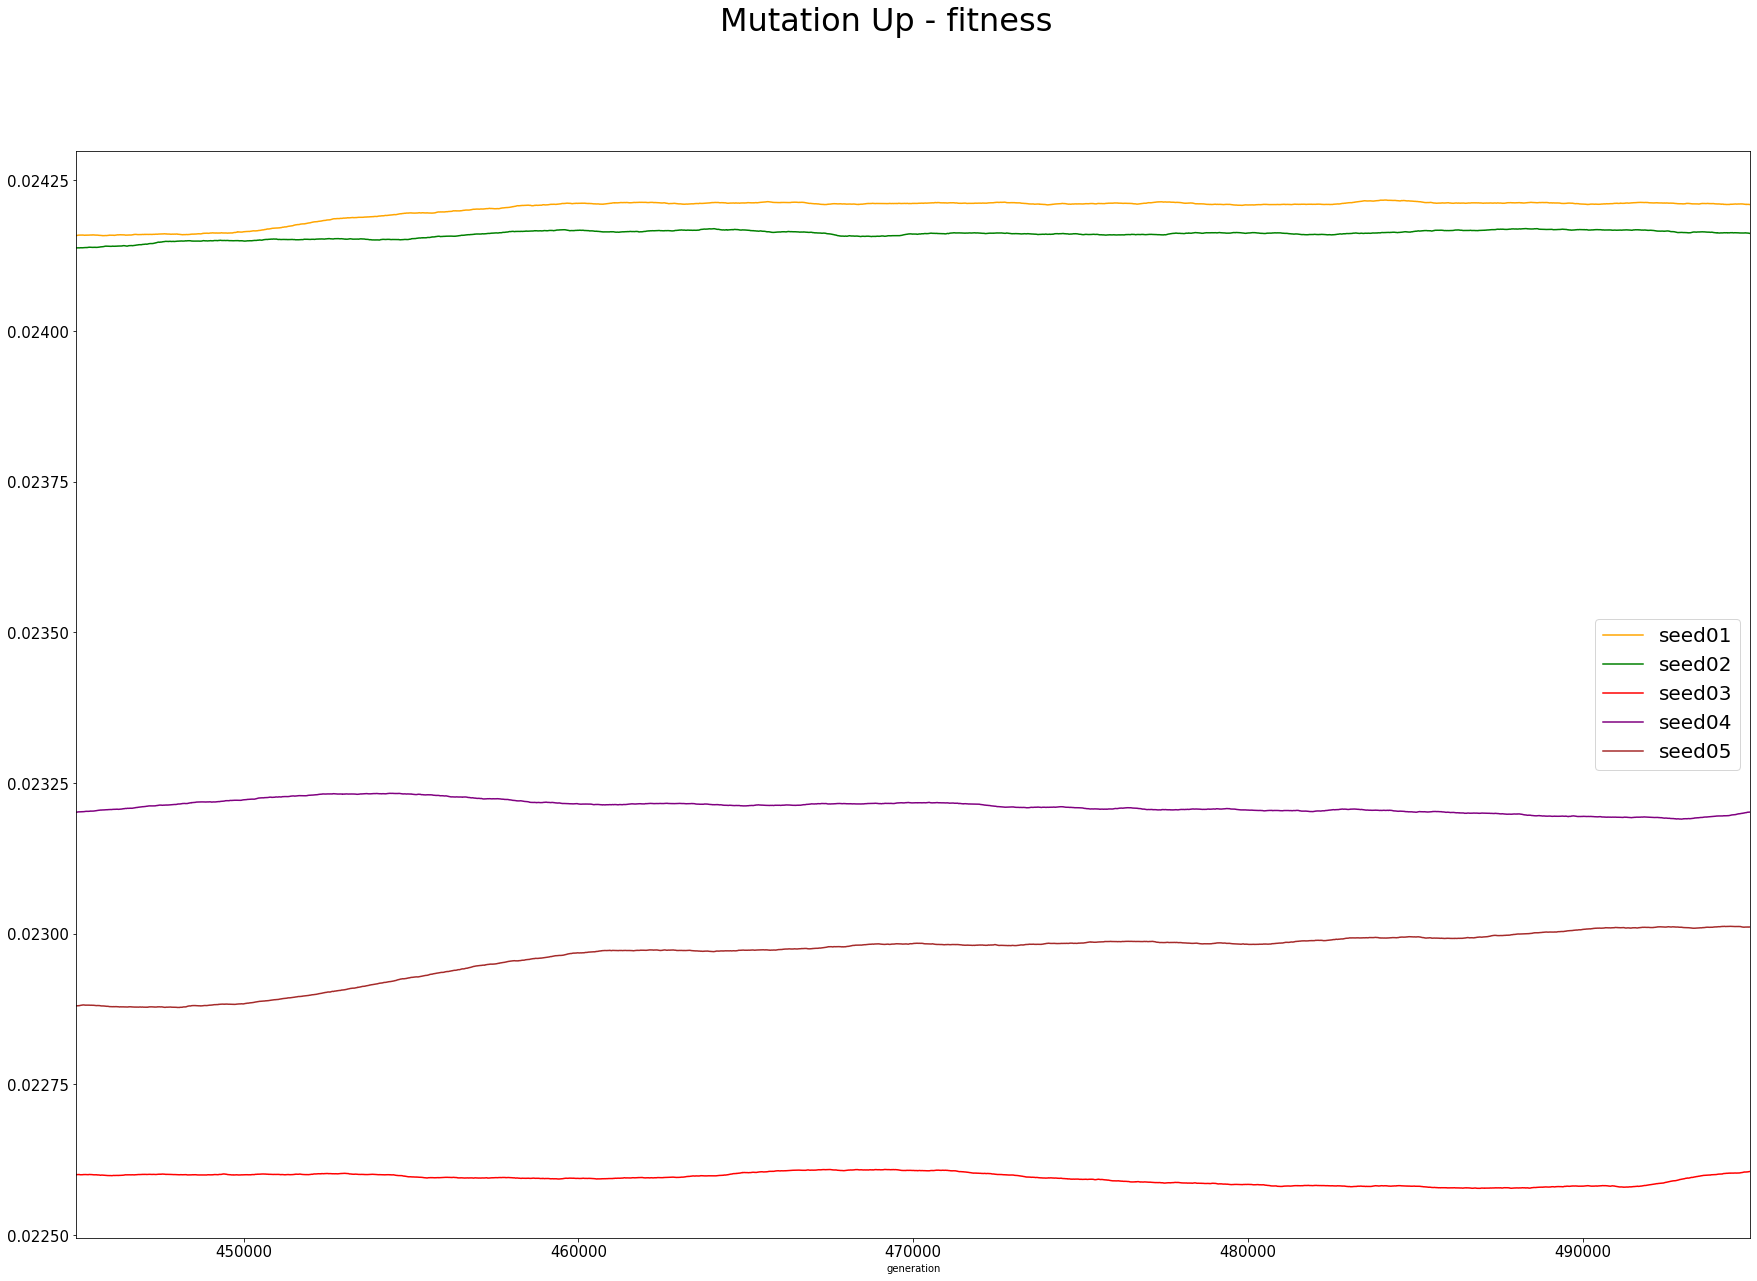

In [16]:
START_GEN = 450000
STOP_GEN = 500000

invalid_headers = ['generation', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present', 'pop_size']

# For each column header that isn't invalid (e.g. genome size, metabolic error, etc.)
num_headers = len(df_seed01_mutation_up_fitness_global.columns) - len(invalid_headers)
for col_counter, col_header in enumerate(df_seed01_mutation_up_fitness_global.columns, -1):
    df_mut_up_mean = pd.DataFrame(data=range(START_GEN, STOP_GEN+1, 1), columns=['generation'])
    df_control_mean = pd.DataFrame(data=range(START_GEN, STOP_GEN+1, 1), columns=['generation'])
    if col_header in invalid_headers:
        continue
    else:
        print(col_counter, '/',num_headers, ' - ', col_header)
        
        # Create a new figure for the current column
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        fig.suptitle('Mutation Up - ' + name(col_header), fontsize=32)
        
        # For each seed of the mut_up condition
        for seed_counter, seed in enumerate(stat_fitness_glob_mut_up):
            # Smooth the results
            df_seed_tmp_mut_up = seed.rolling(WINDOW_SIZE).mean()
            
            # Plot the data
            df_seed_tmp_mut_up.iloc[START_GEN:STOP_GEN].plot(x='generation', y=col_header, label='seed0'+str(seed_counter+1), color=seed_color('seed0'+str(seed_counter+1)), ax=ax)
            
            # Add the seed to this DataFrame to calculate the mean value
            df_mut_up_mean['seed0'+str(seed_counter+1)] = seed[col_header].copy()
            
        for seed_counter, seed in enumerate(stat_fitness_glob_control):
            df_seed_tmp_control = seed[START_GEN:STOP_GEN].rolling(WINDOW_SIZE).mean()
            
            # Add the seed to the temporary DataFrame to calculate the mean
            df_control_mean['seed0'+str(seed_counter+1)] = seed[col_header].copy()
        
        # Calculate the mean for the mut_up condition and plot it to the figure
        df_mut_up_mean['avg'] = df_mut_up_mean.iloc[START_GEN:STOP_GEN,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_mut_up_mean[START_GEN:STOP_GEN].plot(x='generation', y='avg', label='avg '+ name(col_header) + ' mut_up', linewidth=3.0, color='blue', linestyle='dashed', ax=ax)
        
        #  Calculate the mean of the control condition and plot it to the figure
        df_control_mean['avg'] = df_control_mean.iloc[START_GEN:STOP_GEN,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_control_mean.plot(x='generation', y='avg', label='avg ' + name(col_header) + ' control', linewidth=3.0, color='black', linestyle='dashed', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+ 'fitness_global/' + col_header+'.png')
        fig.clear()
        plt.close(fig)
    



print("Done!")
 

## Clean up the DataFrames

In [10]:
print("Cleaning up...")
for seed in stat_fitness_glob_mut_up:
    del seed
for seed in stat_fitness_glob_control:
    del seed
    
del stat_fitness_glob_mut_up, stat_fitness_glob_control
del df_mut_up_mean, df_control_mean, df_seed_tmp_mut_up, df_seed_tmp_control
gc.collect()
print("Done.")

Cleaning up...
Done.


## Graph out stat_genes_global

In [ ]:
START_GEN = 450000
STOP_GEN = 500000

invalid_headers = ['generation']

# For each column header that isn't invalid (e.g. genome size, metabolic error, etc.)
num_headers = len(df_seed01_mutation_up_genes_global.columns) - len(invalid_headers)
for col_counter, col_header in enumerate(df_seed01_mutation_up_genes_global.columns, -1):
    df_mut_up_mean = pd.DataFrame(data=range(START_GEN, STOP_GEN+1, 1), columns=['generation'])
    df_control_mean = pd.DataFrame(data=range(START_GEN, STOP_GEN+1, 1), columns=['generation'])
    if col_header in invalid_headers:
        continue
    else:
        print(col_counter, '/',num_headers, ' - ', col_header)
        
        # Create a new figure for the current column
        fig = plt.figure(figsize=(30,20))
        ax = fig.add_subplot(111)
        fig.suptitle('Mutation Up - ' + name(col_header), fontsize=32)
        
        # For each seed of the mut_up condition
        for seed_counter, seed in enumerate(stat_fitness_glob_mut_up):
            # Smooth the results
            df_seed_tmp_mut_up = seed.rolling(WINDOW_SIZE).mean()
            
            # Plot the data
            df_seed_tmp_mut_up.plot(x='generation', y=col_header, label='seed0'+str(seed_counter+1), color=seed_color('seed0'+str(seed_counter+1)), ax=ax)
            
            # Add the seed to this DataFrame to calculate the mean value
            df_mut_up_mean['seed0'+str(seed_counter+1)] = seed[col_header].copy()
            
        for seed_counter, seed in enumerate(stat_fitness_glob_control):
            df_seed_tmp_control = seed.rolling(WINDOW_SIZE).mean()
            
            # Add the seed to the temporary DataFrame to calculate the mean
            df_control_mean['seed0'+str(seed_counter+1)] = seed[col_header].copy()
        
        # Calculate the mean for the mut_up condition and plot it to the figure
        df_mut_up_mean['avg'] = df_mut_up_mean.iloc[START_GEN:STOP_GEN,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
        #df_mut_up_mean = df_mut_up_mean.iloc[START_GEN:STOP_GEN,:]
        df_mut_up_mean.plot(x='generation', y='avg', label='avg '+ name(col_header) + ' mut_up', linewidth=3.0, color='blue', linestyle='dashed', ax=ax)
        
        #  Calculate the mean of the control condition and plot it to the figure
        df_control_mean['avg'] = df_control_mean.iloc[START_GEN:STOP_GEN,1:].mean(axis=1).rolling(WINDOW_SIZE).mean()
        df_control_mean.plot(x='generation', y='avg', label='avg ' + name(col_header) + ' control', linewidth=3.0, color='black', linestyle='dashed', ax=ax)
        
        fig.savefig(OUTPUT_ROOT_DIR+ 'fitness_global/' + col_header+'.png')
        fig.clear()
        plt.close(fig)
    



print("Done!")
 